<a href="https://colab.research.google.com/github/Barrok/BTC_price_prediction/blob/main/script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load dataset
df = pd.read_csv('BTC-USD.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-19,3652.377930,3758.533447,3652.377930,3728.568359,3728.568359,5955691380
1,2019-01-20,3725.446045,3743.387939,3583.019531,3601.013672,3601.013672,5582489560
2,2019-01-21,3600.372803,3608.840820,3558.537109,3576.032471,3576.032471,5004347059
3,2019-01-22,3575.081299,3620.746582,3539.721436,3604.577148,3604.577148,5313623556
4,2019-01-23,3605.557129,3623.067871,3565.313965,3585.123047,3585.123047,5433755649


In [ ]:
df.shape

(1401, 7)

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1.401000e+03
mean,23976.500146,24573.403114,23308.342276,23982.776718,23982.776718,3.243484e+10
std,17757.006002,18221.260763,17208.700420,17744.599910,17744.599910,1.890346e+10
min,3401.376465,3427.945557,3391.023682,3399.471680,3399.471680,5.004347e+09
25%,9158.005859,9287.471680,9028.717773,9162.917969,9162.917969,2.038203e+10
50%,18806.765625,19248.068359,18319.822266,18803.656250,18803.656250,2.928040e+10
75%,39316.890625,40418.878906,38112.812500,39294.199219,39294.199219,3.961692e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401 entries, 0 to 1400
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1401 non-null   object 
 1   Open       1401 non-null   float64
 2   High       1401 non-null   float64
 3   Low        1401 non-null   float64
 4   Close      1401 non-null   float64
 5   Adj Close  1401 non-null   float64
 6   Volume     1401 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 76.7+ KB


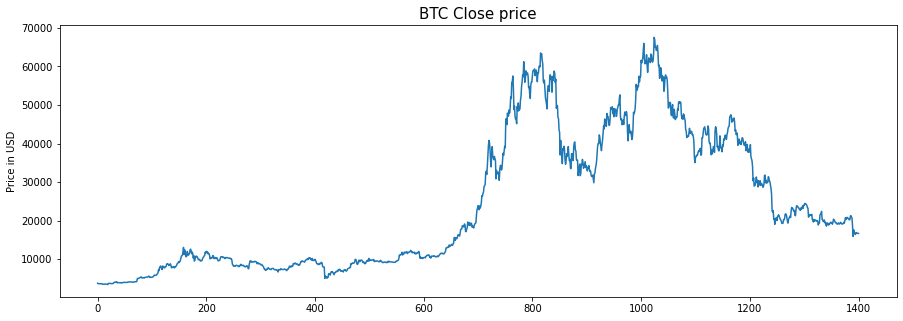

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(df['Close'])
plt.title('BTC Close price', fontsize=15)
plt.ylabel('Price in USD')
plt.show()

In [ ]:
# check if there are any NULL values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

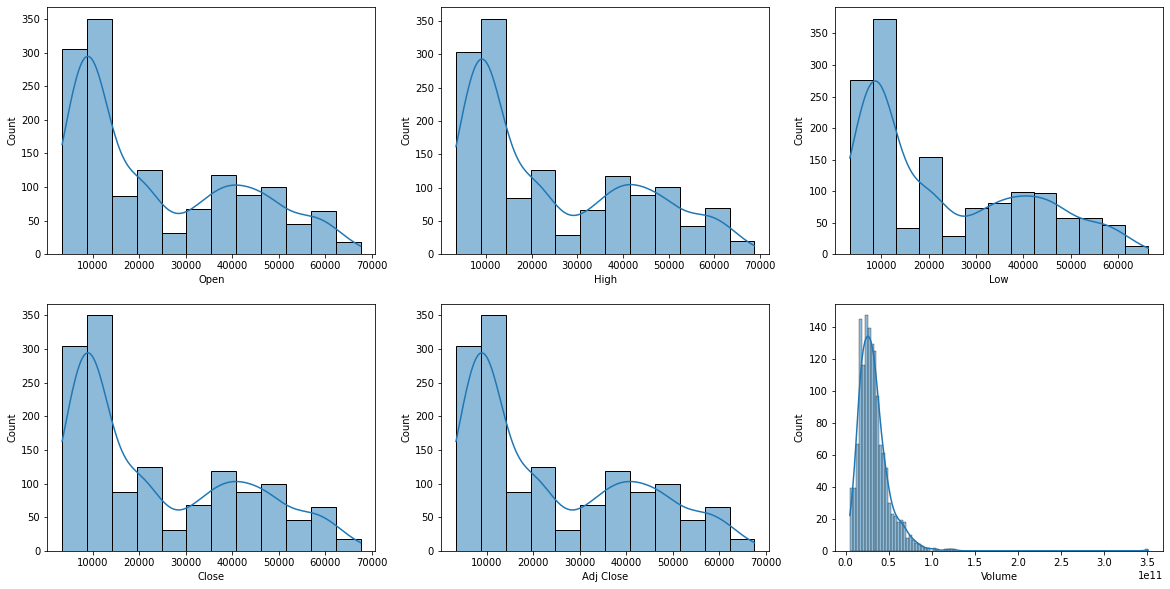

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.histplot(df[col], kde = True)
plt.show()

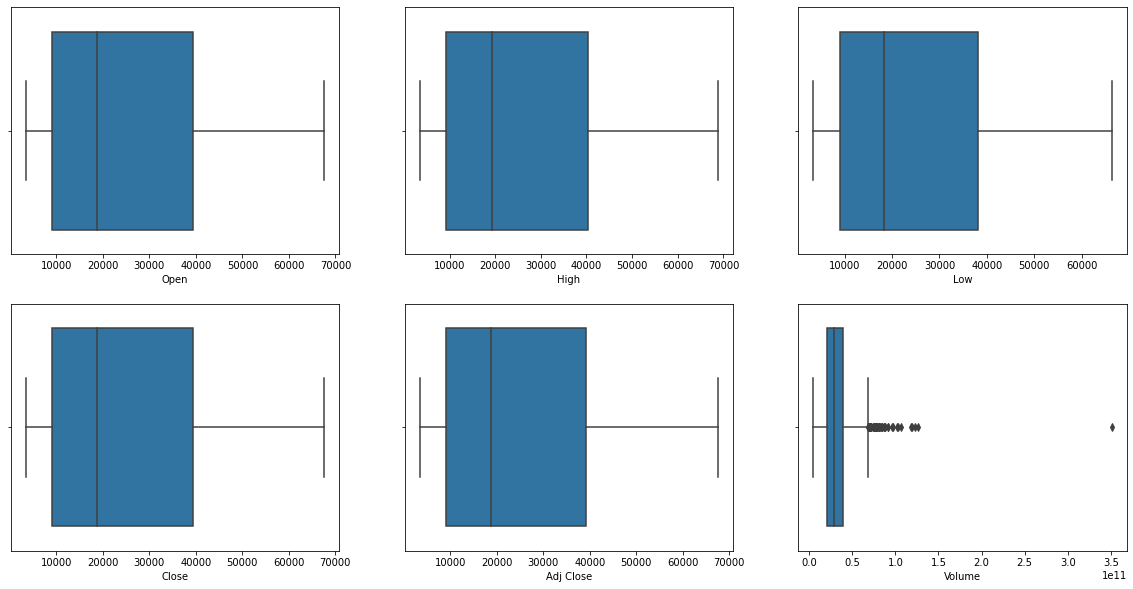

In [ ]:
plt.subplots(figsize = (20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [ ]:
splitted = df['Date'].str.split('-', expand=True)
 
df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')
 
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,2019-01-19,3652.377930,3758.533447,3652.377930,3728.568359,3728.568359,5955691380,2019,1,19
1,2019-01-20,3725.446045,3743.387939,3583.019531,3601.013672,3601.013672,5582489560,2019,1,20
2,2019-01-21,3600.372803,3608.840820,3558.537109,3576.032471,3576.032471,5004347059,2019,1,21
3,2019-01-22,3575.081299,3620.746582,3539.721436,3604.577148,3604.577148,5313623556,2019,1,22
4,2019-01-23,3605.557129,3623.067871,3565.313965,3585.123047,3585.123047,5433755649,2019,1,23


In [ ]:
df['quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,quarter_end
0,2019-01-19,3652.377930,3758.533447,3652.377930,3728.568359,3728.568359,5955691380,2019,1,19,0
1,2019-01-20,3725.446045,3743.387939,3583.019531,3601.013672,3601.013672,5582489560,2019,1,20,0
2,2019-01-21,3600.372803,3608.840820,3558.537109,3576.032471,3576.032471,5004347059,2019,1,21,0
3,2019-01-22,3575.081299,3620.746582,3539.721436,3604.577148,3604.577148,5313623556,2019,1,22,0
4,2019-01-23,3605.557129,3623.067871,3565.313965,3585.123047,3585.123047,5433755649,2019,1,23,0


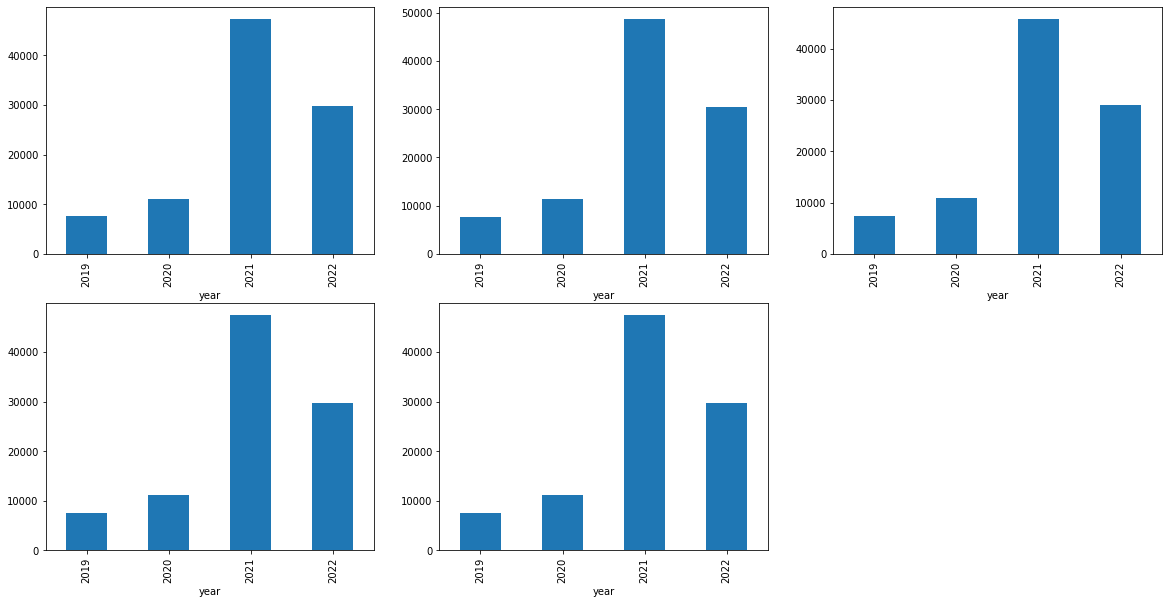

In [ ]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close', 'Adj Close']):
  plt.subplot(2,3,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [ ]:
df.groupby('quarter_end').mean()

,Open,High,Low,Close,Adj Close,Volume,year,month,day,open-close,low-high,target
quarter_end,,,,,,,,,,,,
0,24201.998352,24811.552815,23537.564164,24218.953261,24218.953261,3.317302e+10,2020.510593,6.070975,15.727754,-16.954908,-1273.988650,0.519068
1,23510.700789,24081.470252,22834.851110,23494.919701,23494.919701,3.091003e+10,2020.398249,7.194748,15.737418,15.781088,-1246.619143,0.514223


In [ ]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

In [ ]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume,year,month,day,quarter_end,open-close,low-high,target
Open,1.000000,0.999198,0.998493,0.997952,0.997952,0.439742,0.658602,-0.021911,-0.019546,-0.018258,0.042906,-0.716619,-0.043047
High,0.999198,1.000000,0.998380,0.999087,0.999087,0.448074,0.656848,-0.024934,-0.018885,-0.018791,0.012651,-0.728210,-0.043900
Low,0.998493,0.998380,1.000000,0.998956,0.998956,0.421595,0.659465,-0.017412,-0.020544,-0.019151,0.003686,-0.688033,-0.045930
Close,0.997952,0.999087,0.998956,1.000000,1.000000,0.436297,0.657081,-0.022318,-0.020133,-0.019136,-0.021089,-0.709634,-0.045871
Adj Close,0.997952,0.999087,0.998956,1.000000,1.000000,0.436297,0.657081,-0.022318,-0.020133,-0.019136,-0.021089,-0.709634,-0.045871
Volume,0.439742,0.448074,0.421595,0.436297,0.436297,1.000000,0.341362,-0.132855,-0.002303,-0.056144,0.058612,-0.636466,-0.024044
year,0.658602,0.656848,0.659465,0.657081,0.657081,0.341362,1.000000,-0.093018,-0.025147,-0.047965,0.030947,-0.433987,-0.046325
month,-0.021911,-0.024934,-0.017412,-0.022318,-0.022318,-0.132855,-0.093018,1.000000,-0.015894,0.157548,0.006108,0.108267,-0.008210
day,-0.019546,-0.018885,-0.020544,-0.020133,-0.020133,-0.002303,-0.025147,-0.015894,1.000000,0.000515,0.008949,-0.006590,0.004886
quarter_end,-0.018258,-0.018791,-0.019151,-0.019136,-0.019136,-0.056144,-0.047965,0.157548,0.000515,1.000000,0.013514,0.008984,-0.004545


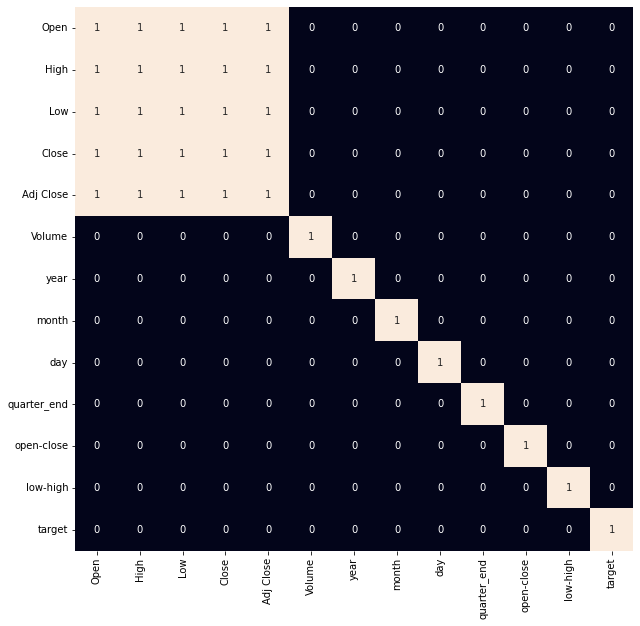

In [ ]:
plt.figure(figsize=(10, 10))
 
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [ ]:
features = df[['open-close', 'low-high', 'quarter_end']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(1260, 3) (141, 3)


In [ ]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5229307546488764
Validation Accuracy :  0.5441176470588236

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4911666931703734
Validation Accuracy :  0.5553988718775181

XGBClassifier() : 
Training Accuracy :  0.7833801565485611
Validation Accuracy :  0.5150080580177276



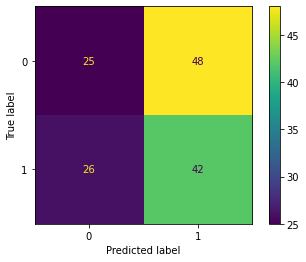

In [ ]:
metrics.plot_confusion_matrix(models[2], X_valid, Y_valid)
plt.show()